In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns

# Loading the dataset

In [18]:
bicycleTheft = pd.read_csv(r"C:\Users\hp\Downloads\Bicycle_Theft_In_Toronto\bicycle-thefts - 4326.csv")

In [19]:
bicycleTheft

,_id,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DOW,REPORT_DAY,REPORT_DOY,REPORT_HOUR,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_MAKE,BIKE_MODEL,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,geometry
0,1,GO-20141261431,THEFT UNDER,2014-01-01,2014,January,Wednesday,1,1,7.0,2014-01-01,2014,January,Wednesday,1,1,7.0,D14,"Apartment (Rooming House, Condo)",Apartment,SUPERCYCLE,NaN,MT,10.0,NaN,NaN,STOLEN,"{'type': 'MultiPoint', 'coordinates': [[-79.44..."
1,2,GO-20141263784,PROPERTY - FOUND,2014-01-01,2014,January,Wednesday,1,1,18.0,2014-01-01,2014,January,Wednesday,1,1,18.0,D14,"Single Home, House (Attach Garage, Cottage, Mo...",House,TREK,SOHO S,RG,1.0,BLK,NaN,RECOVERED,"{'type': 'MultiPoint', 'coordinates': [[-79.41..."
2,3,GO-20141263544,B&E,2013-12-26,2013,December,Thursday,26,360,19.0,2014-01-01,2014,January,Wednesday,1,1,17.0,D14,Other Commercial / Corporate Places (For Profi...,Commercial,FELT,F59,RC,21.0,SILRED,1300.0,STOLEN,"{'type': 'MultiPoint', 'coordinates': [[-79.39..."
3,4,GO-20141266048,THEFT UNDER,2013-12-30,2013,December,Monday,30,364,17.0,2014-01-02,2014,January,Thursday,2,2,8.0,D53,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,KHS,VITAMIN A,OT,24.0,WHI,500.0,STOLEN,"{'type': 'MultiPoint', 'coordinates': [[-79.42..."
4,5,GO-20141267465,THEFT UNDER,2013-09-30,2013,September,Monday,30,273,NaN,2014-01-02,2014,January,Thursday,2,2,12.0,D14,"Apartment (Rooming House, Condo)",Apartment,NORCO,CHARGER 9.2,MT,21.0,BLK,750.0,STOLEN,"{'type': 'MultiPoint', 'coordinates': [[-79.40..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31965,31966,GO-20222548508,THEFT OF EBIKE UNDER $5000,2022-12-29,2022,December,Thursday,29,363,19.0,2022-12-29,2022,December,Thursday,29,363,20.0,D53,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,ZZZ,TORONTO RIDE SH,TO,16.0,BLK,NaN,STOLEN,"{'type': 'MultiPoint', 'coordinates': [[-79.38..."
31966,31967,GO-20229051757,THEFT OF EBIKE UNDER $5000,2022-12-28,2022,December,Wednesday,28,362,22.0,2022-12-29,2022,December,Thursday,29,363,11.0,D52,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,UK,NaN,EL,5.0,BLK,1500.0,STOLEN,"{'type': 'MultiPoint', 'coordinates': [[-79.39..."
31967,31968,GO-20222553977,THEFT UNDER - BICYCLE,2022-10-15,2022,October,Saturday,15,288,14.0,2022-12-30,2022,December,Friday,30,364,16.0,D23,Other Non Commercial / Corporate Places (Non-P...,Other,CCM,NaN,RG,24.0,BLU,NaN,STOLEN,"{'type': 'MultiPoint', 'coordinates': [[-79.58..."
31968,31969,GO-20229051676,THEFT UNDER,2022-12-30,2022,December,Friday,30,364,10.0,2022-12-31,2022,December,Saturday,31,365,9.0,D11,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,CA,QUICK 4,RG,9.0,LBL,1600.0,STOLEN,"{'type': 'MultiPoint', 'coordinates': [[-79.44..."


# Data understanding

In [20]:
bicycleTheft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31970 entries, 0 to 31969
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              31970 non-null  int64  
 1   EVENT_UNIQUE_ID  31970 non-null  object 
 2   PRIMARY_OFFENCE  31970 non-null  object 
 3   OCC_DATE         31970 non-null  object 
 4   OCC_YEAR         31970 non-null  int64  
 5   OCC_MONTH        31970 non-null  object 
 6   OCC_DOW          31970 non-null  object 
 7   OCC_DAY          31970 non-null  int64  
 8   OCC_DOY          31970 non-null  int64  
 9   OCC_HOUR         30150 non-null  float64
 10  REPORT_DATE      31970 non-null  object 
 11  REPORT_YEAR      31970 non-null  int64  
 12  REPORT_MONTH     31970 non-null  object 
 13  REPORT_DOW       31970 non-null  object 
 14  REPORT_DAY       31970 non-null  int64  
 15  REPORT_DOY       31970 non-null  int64  
 16  REPORT_HOUR      31376 non-null  float64
 17  DIVISION    

In [21]:
bicycleTheft.describe()

,_id,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,BIKE_SPEED,BIKE_COST
count,31970.000000,31970.000000,31970.000000,31970.000000,30150.000000,31970.000000,31970.000000,31970.000000,31376.000000,29997.000000,28325.000000
mean,15985.500000,2017.959431,15.613388,201.442227,14.064146,2017.978542,15.933813,202.526587,14.498916,15.005301,1023.959805
std,9229.088389,2.466951,8.610030,76.996271,5.862630,2.462565,8.571142,77.351960,4.709817,10.237632,1634.752496
min,1.000000,2009.000000,1.000000,1.000000,1.000000,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7993.250000,2016.000000,8.000000,151.000000,10.000000,2016.000000,9.000000,152.000000,11.000000,7.000000,400.000000
50%,15985.500000,2018.000000,16.000000,204.000000,15.000000,2018.000000,16.000000,206.000000,14.000000,18.000000,700.000000
75%,23977.750000,2020.000000,23.000000,258.000000,19.000000,2020.000000,23.000000,260.000000,18.000000,21.000000,1149.990000
max,31970.000000,2022.000000,31.000000,366.000000,23.000000,2022.000000,31.000000,366.000000,23.000000,99.000000,120000.000000


In [22]:
bicycleTheft.dtypes.value_counts()

object     17
int64       7
float64     4
Name: count, dtype: int64

In [23]:
bicycleTheft_numeric = bicycleTheft.select_dtypes(include='number')

In [24]:
bicycleTheft_numeric.corr()

,_id,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,BIKE_SPEED,BIKE_COST
_id,1.000000,0.991889,0.011537,0.085151,-0.011471,0.993154,0.028516,0.087643,0.003946,-0.013441,0.048534
OCC_YEAR,0.991889,1.000000,0.008492,-0.024193,-0.012190,0.997722,0.027540,-0.011331,0.006035,-0.015044,0.049568
OCC_DAY,0.011537,0.008492,1.000000,0.058075,-0.002022,0.007841,0.612731,0.037158,0.006308,-0.000165,0.003425
OCC_DOY,0.085151,-0.024193,0.058075,1.000000,0.004733,-0.016262,0.020127,0.893088,-0.012571,0.017203,-0.011610
OCC_HOUR,-0.011471,-0.012190,-0.002022,0.004733,1.000000,-0.011899,-0.006194,0.004146,0.128644,-0.004059,-0.011636
REPORT_YEAR,0.993154,0.997722,0.007841,-0.016262,-0.011899,1.000000,0.024680,-0.022945,0.006137,-0.015070,0.050609
REPORT_DAY,0.028516,0.027540,0.612731,0.020127,-0.006194,0.024680,1.000000,0.042831,-0.017335,0.004360,0.002930
REPORT_DOY,0.087643,-0.011331,0.037158,0.893088,0.004146,-0.022945,0.042831,1.000000,-0.019717,0.015834,-0.016934
REPORT_HOUR,0.003946,0.006035,0.006308,-0.012571,0.128644,0.006137,-0.017335,-0.019717,1.000000,0.030259,-0.031319
BIKE_SPEED,-0.013441,-0.015044,-0.000165,0.017203,-0.004059,-0.015070,0.004360,0.015834,0.030259,1.000000,0.023829


In [25]:
bicycleTheft.isnull().sum()

_id                    0
EVENT_UNIQUE_ID        0
PRIMARY_OFFENCE        0
OCC_DATE               0
OCC_YEAR               0
OCC_MONTH              0
OCC_DOW                0
OCC_DAY                0
OCC_DOY                0
OCC_HOUR            1820
REPORT_DATE            0
REPORT_YEAR            0
REPORT_MONTH           0
REPORT_DOW             0
REPORT_DAY             0
REPORT_DOY             0
REPORT_HOUR          594
DIVISION               0
LOCATION_TYPE          0
PREMISES_TYPE          0
BIKE_MAKE            157
BIKE_MODEL         12077
BIKE_TYPE              0
BIKE_SPEED          1973
BIKE_COLOUR         2665
BIKE_COST           3645
STATUS                 0
geometry               0
dtype: int64

In [26]:
for x in bicycleTheft:
    print(f"Unique Values in {x} : {bicycleTheft[x].nunique()}")

Unique Values in _id : 31970
Unique Values in EVENT_UNIQUE_ID : 28458
Unique Values in PRIMARY_OFFENCE : 76
Unique Values in OCC_DATE : 3189
Unique Values in OCC_YEAR : 14
Unique Values in OCC_MONTH : 12
Unique Values in OCC_DOW : 7
Unique Values in OCC_DAY : 31
Unique Values in OCC_DOY : 366
Unique Values in OCC_HOUR : 23
Unique Values in REPORT_DATE : 3168
Unique Values in REPORT_YEAR : 9
Unique Values in REPORT_MONTH : 12
Unique Values in REPORT_DOW : 7
Unique Values in REPORT_DAY : 31
Unique Values in REPORT_DOY : 366
Unique Values in REPORT_HOUR : 23
Unique Values in DIVISION : 17
Unique Values in LOCATION_TYPE : 43
Unique Values in PREMISES_TYPE : 7
Unique Values in BIKE_MAKE : 1046
Unique Values in BIKE_MODEL : 9813
Unique Values in BIKE_TYPE : 13
Unique Values in BIKE_SPEED : 68
Unique Values in BIKE_COLOUR : 276
Unique Values in BIKE_COST : 1960
Unique Values in STATUS : 3
Unique Values in geometry : 8897


<Axes: xlabel='REPORT_DOW', ylabel='Count'>

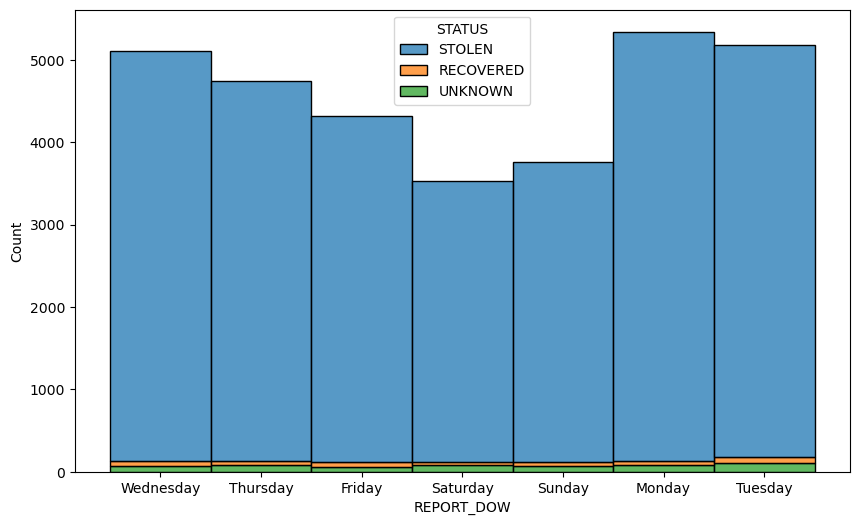

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x="REPORT_DOW", hue="STATUS", data=bicycleTheft, stat="count", multiple="stack")

<Axes: xlabel='PREMISES_TYPE', ylabel='Count'>

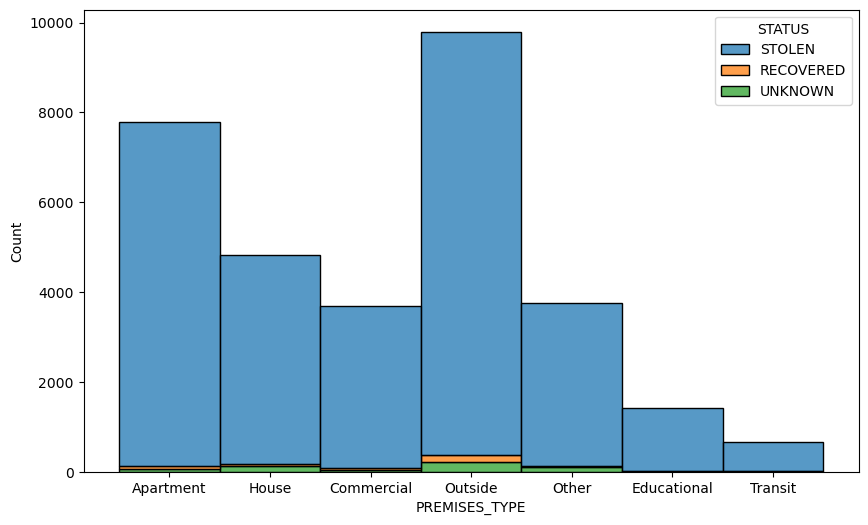

In [28]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x="PREMISES_TYPE", hue="STATUS", data=bicycleTheft, stat="count", multiple="stack")

<Axes: xlabel='OCC_DOW', ylabel='Count'>

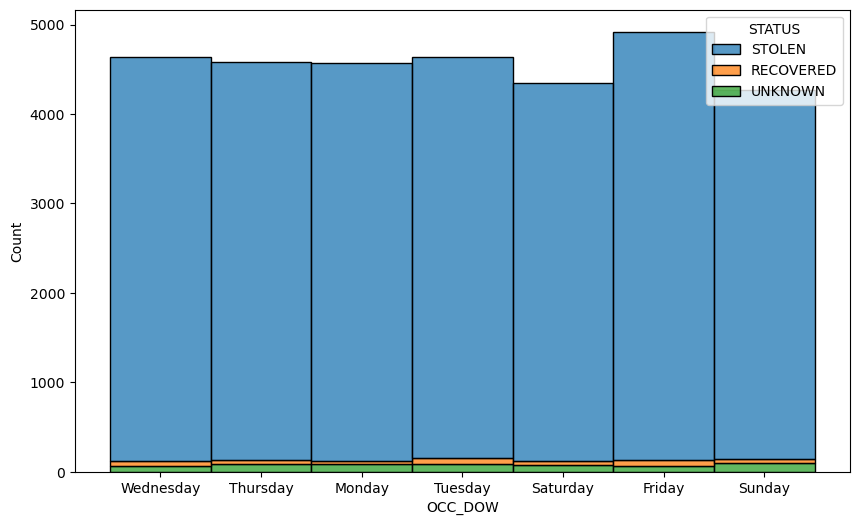

In [29]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x="OCC_DOW", hue="STATUS", data=bicycleTheft, stat="count", multiple="stack")

<Axes: xlabel='OCC_HOUR', ylabel='Count'>

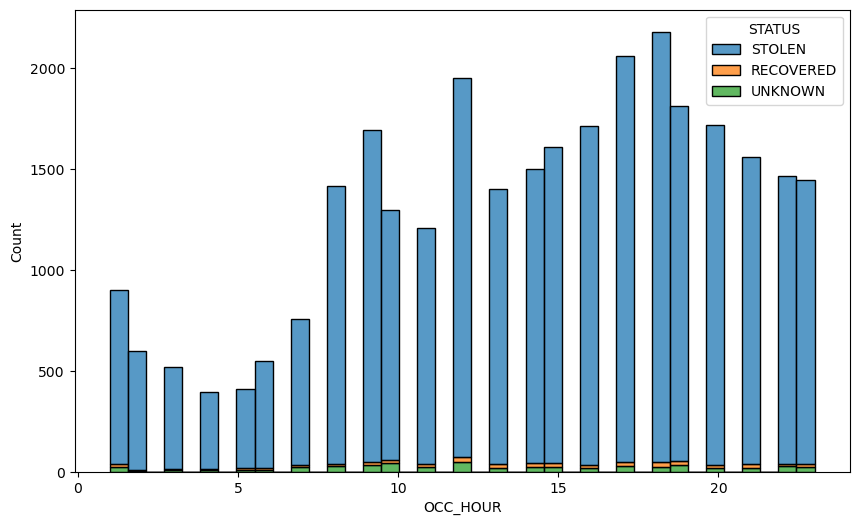

In [30]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x="OCC_HOUR", hue="STATUS", data=bicycleTheft, stat="count", multiple="stack")

<Axes: xlabel='BIKE_TYPE', ylabel='Count'>

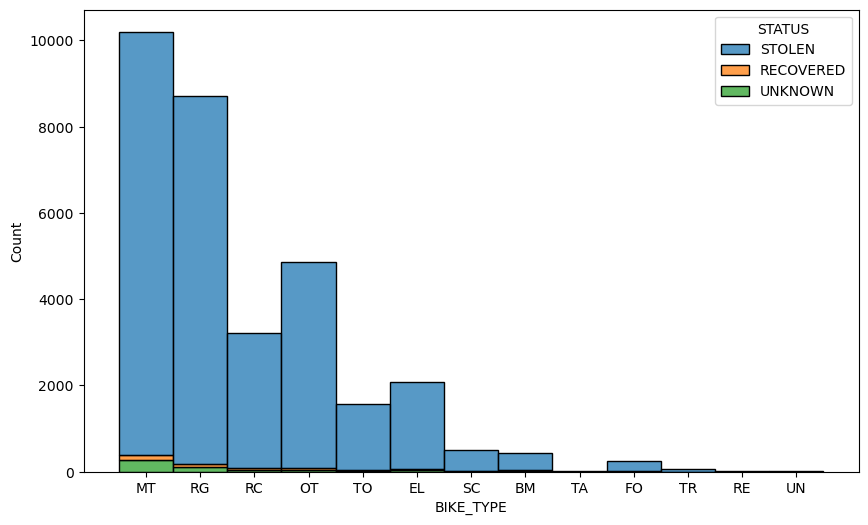

In [31]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x="BIKE_TYPE", hue="STATUS", data=bicycleTheft, stat="count", multiple="stack")

In [32]:
statusOfBicycle = bicycleTheft.groupby(['BIKE_TYPE','STATUS', 'OCC_YEAR']).size().reset_index(name='count')

In [33]:
statusOfBicycle01 = statusOfBicycle[statusOfBicycle['STATUS'] == 'STOLEN']

In [34]:
statusOfBicycle01

,BIKE_TYPE,STATUS,OCC_YEAR,count
5,BM,STOLEN,2010,1
6,BM,STOLEN,2014,66
7,BM,STOLEN,2015,59
8,BM,STOLEN,2016,40
9,BM,STOLEN,2017,44
...,...,...,...,...
255,UN,STOLEN,2016,2
256,UN,STOLEN,2018,2
257,UN,STOLEN,2020,3
258,UN,STOLEN,2021,2


<Axes: xlabel='BIKE_TYPE', ylabel='Count'>

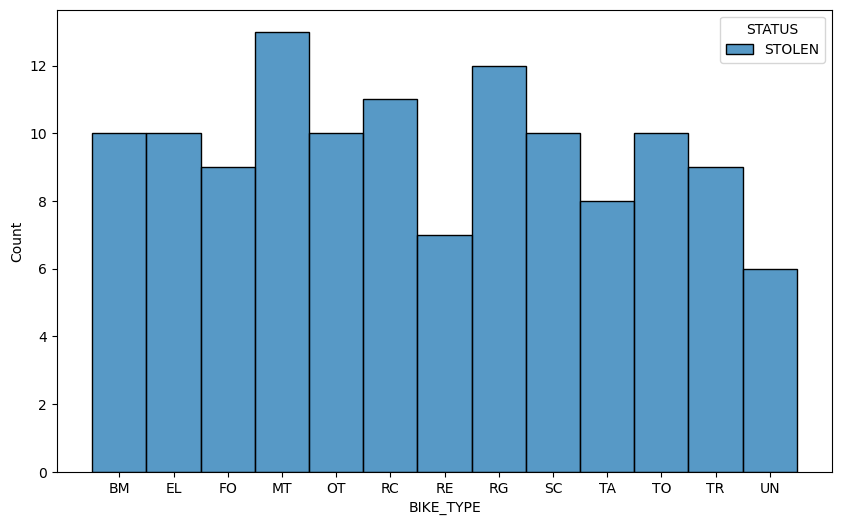

In [35]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x="BIKE_TYPE", hue="STATUS", data=statusOfBicycle01, stat="count", multiple="stack")

<Axes: xlabel='OCC_YEAR', ylabel='Count'>

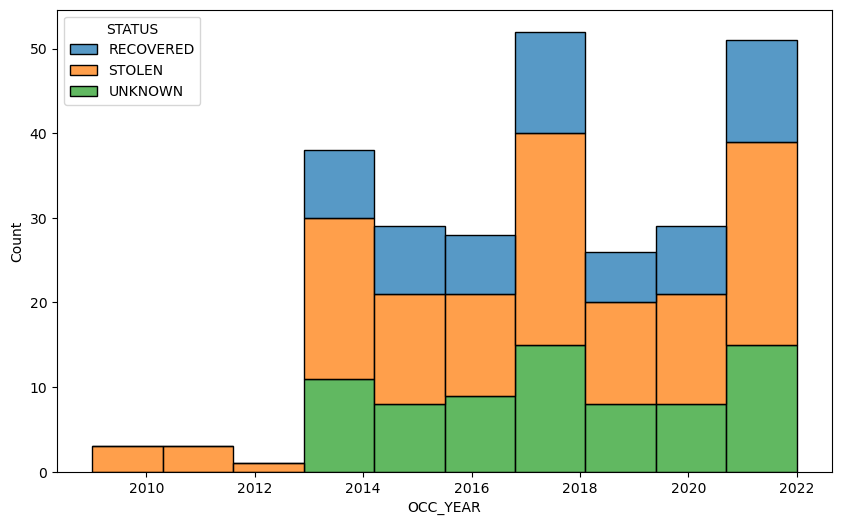

In [36]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x="OCC_YEAR" ,hue="STATUS", data=statusOfBicycle, stat="count", multiple="stack")

<Axes: xlabel='OCC_YEAR', ylabel='Count'>

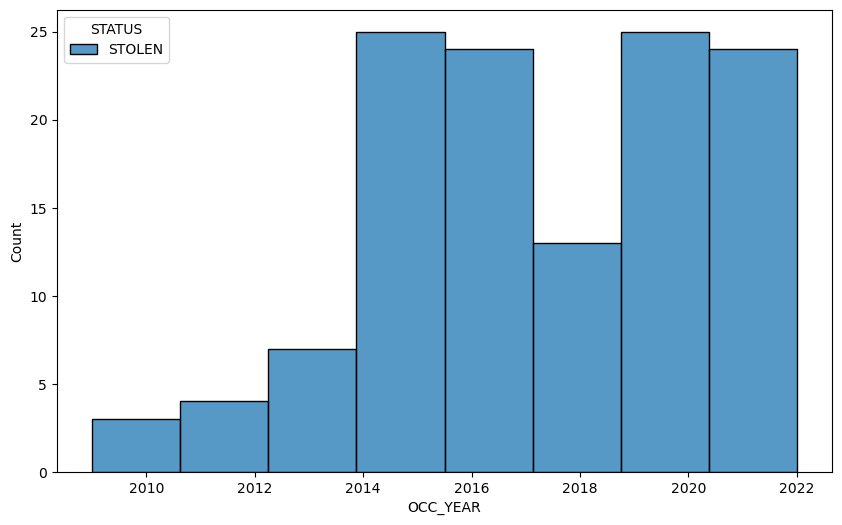

In [37]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x="OCC_YEAR" ,hue="STATUS", data=statusOfBicycle01, stat="count", multiple="stack")

<Axes: xlabel='OCC_DOY', ylabel='Count'>

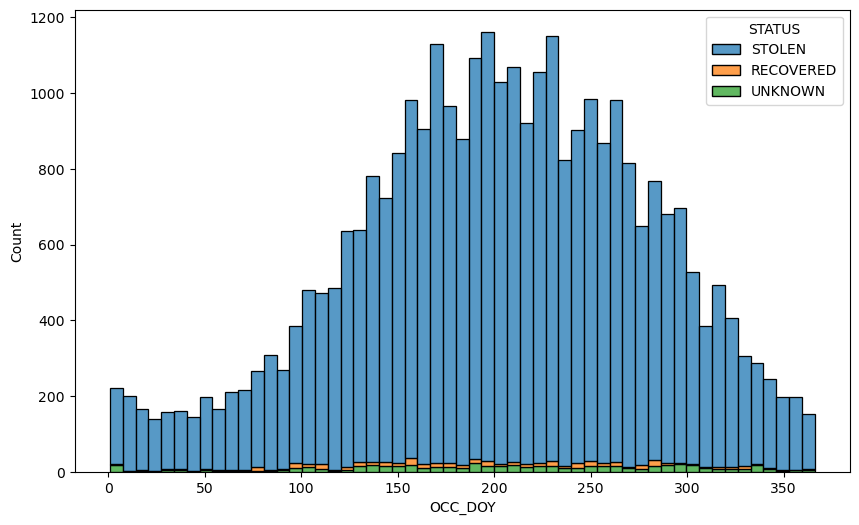

In [38]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x="OCC_DOY", hue="STATUS", data=bicycleTheft, stat="count", multiple="stack")

<Axes: xlabel='REPORT_DOY', ylabel='Count'>

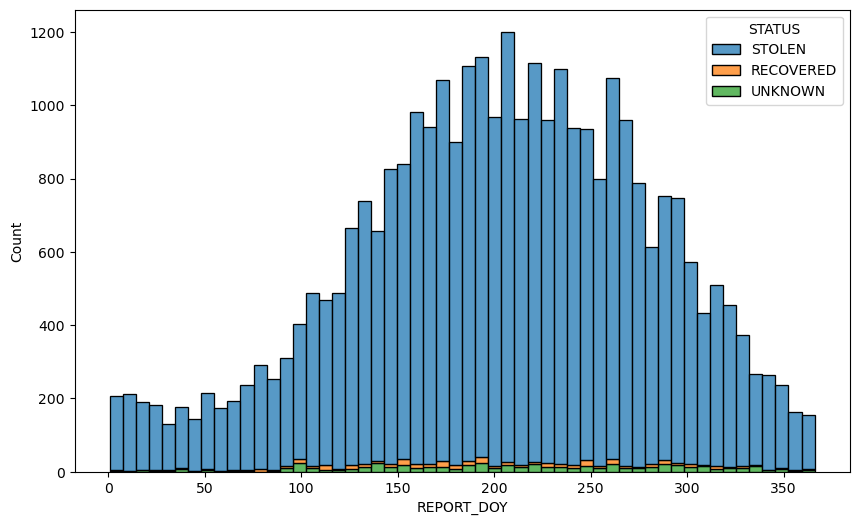

In [39]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x="REPORT_DOY", hue="STATUS", data=bicycleTheft, stat="count", multiple="stack")

## Histograms for frequency count of each column

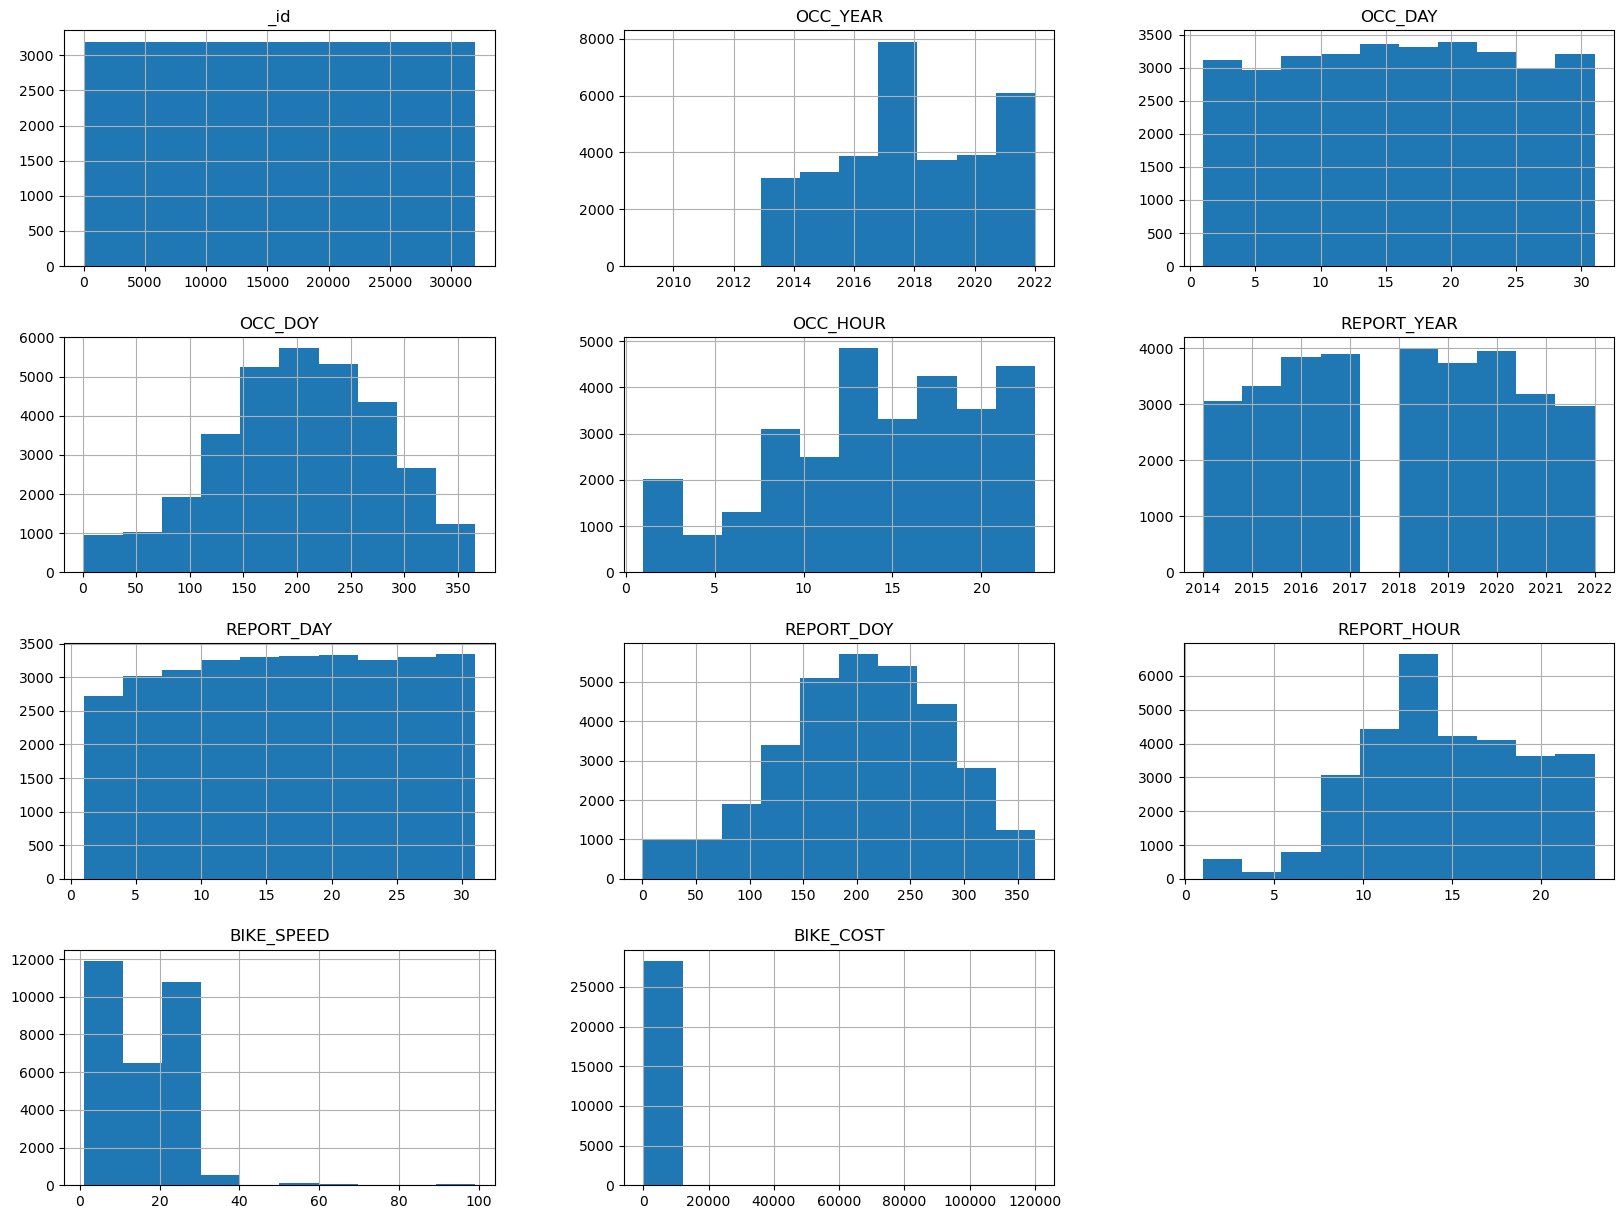

In [40]:
bicycleTheft.hist(figsize = (20,15))
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1500 with 0 Axes>

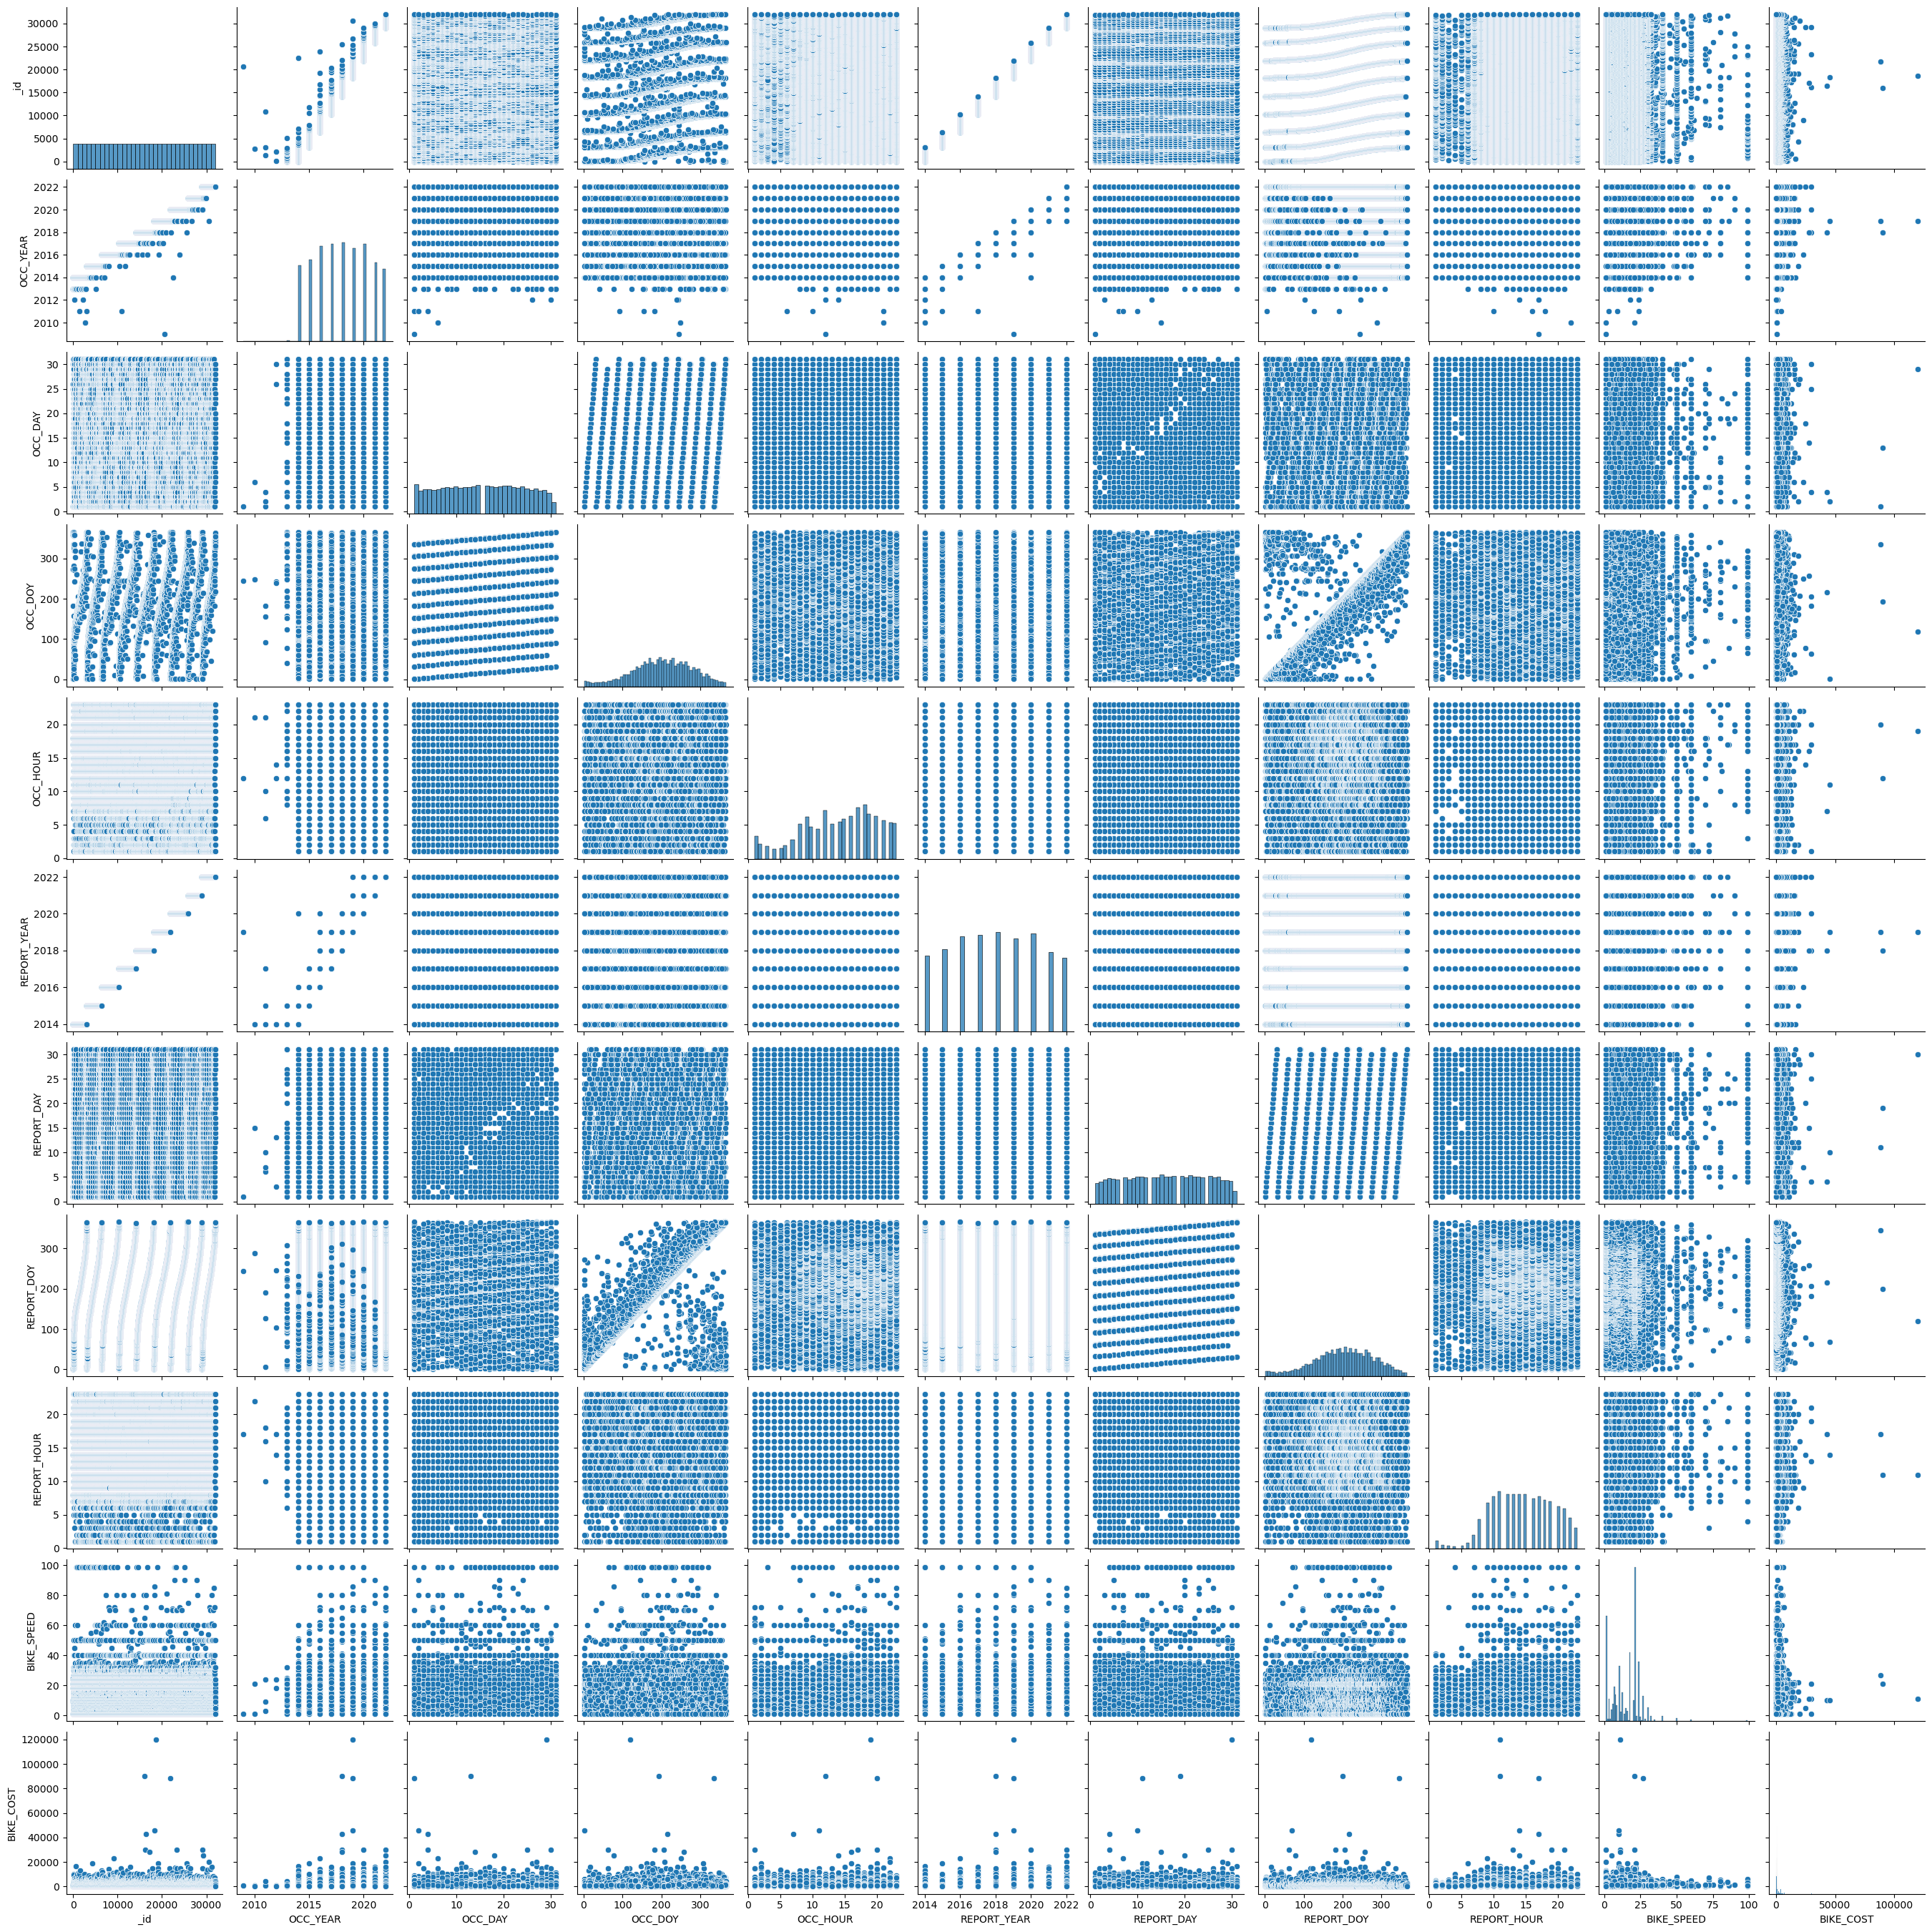

In [41]:
plt.figure(figsize = (20,15))
sns.pairplot(bicycleTheft)


<Axes: >

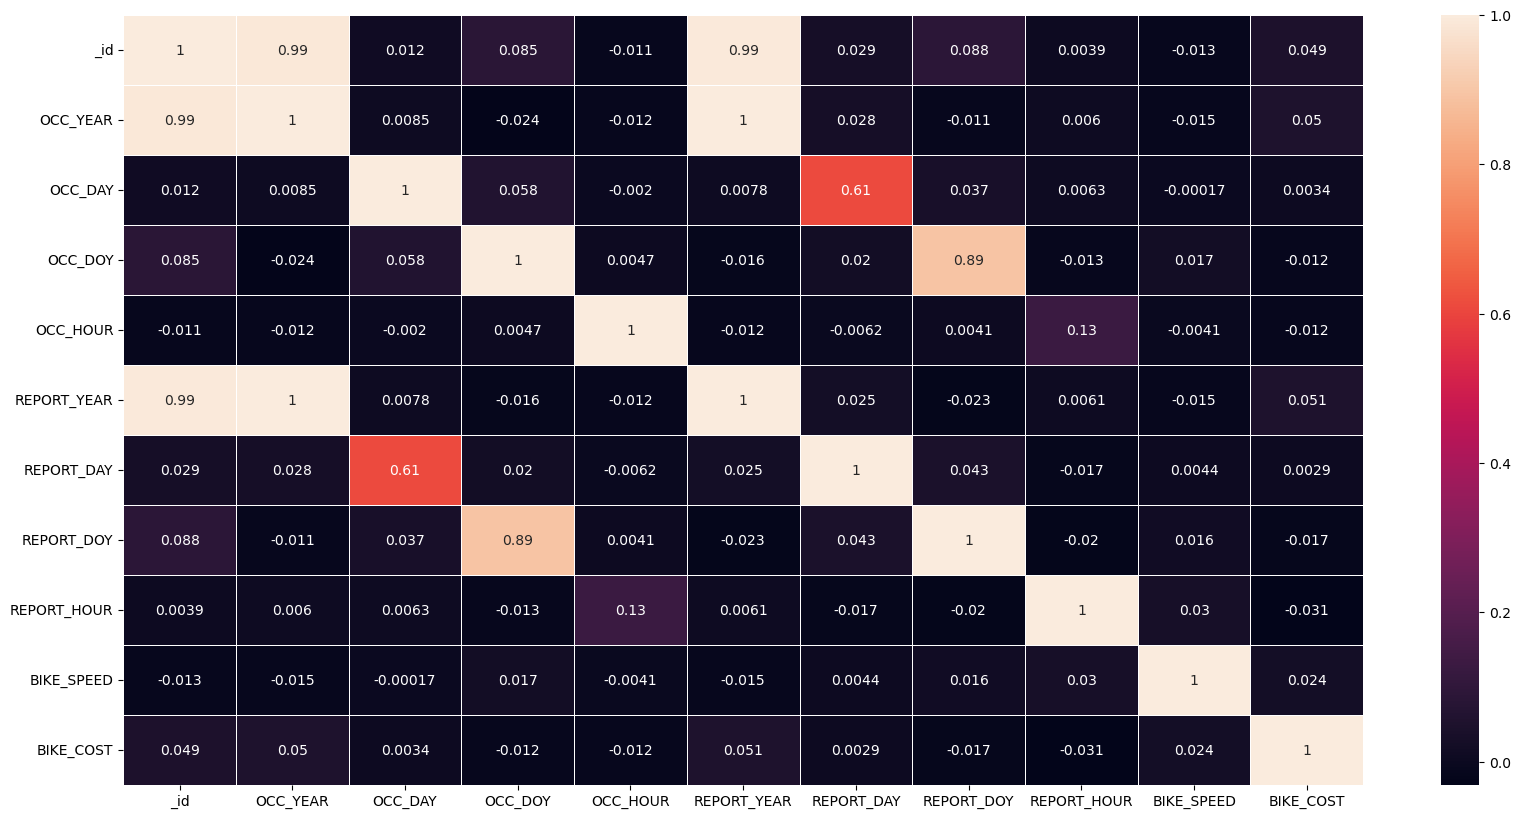

In [42]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(bicycleTheft_numeric.corr(), annot=True,linewidths=.5, ax=ax)

# Data Preparation

## 1. Removing the unnecessary columns:- 

In [129]:
bicycleTheft01 = bicycleTheft.drop(['_id', 'EVENT_UNIQUE_ID', 'DIVISION', 'geometry','OCC_DATE', 'OCC_DOY','LOCATION_TYPE',
                   'REPORT_DATE', 'REPORT_MONTH', 'REPORT_YEAR', 'REPORT_DOY','REPORT_HOUR', 'BIKE_MODEL',
                   'REPORT_DAY'], axis=1)

In [130]:
bicycleTheft01

,PRIMARY_OFFENCE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,REPORT_DOW,PREMISES_TYPE,BIKE_MAKE,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS
0,THEFT UNDER,2014,January,Wednesday,1,7.0,Wednesday,Apartment,SUPERCYCLE,MT,10.0,NaN,NaN,STOLEN
1,PROPERTY - FOUND,2014,January,Wednesday,1,18.0,Wednesday,House,TREK,RG,1.0,BLK,NaN,RECOVERED
2,B&E,2013,December,Thursday,26,19.0,Wednesday,Commercial,FELT,RC,21.0,SILRED,1300.0,STOLEN
3,THEFT UNDER,2013,December,Monday,30,17.0,Thursday,Outside,KHS,OT,24.0,WHI,500.0,STOLEN
4,THEFT UNDER,2013,September,Monday,30,NaN,Thursday,Apartment,NORCO,MT,21.0,BLK,750.0,STOLEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31965,THEFT OF EBIKE UNDER $5000,2022,December,Thursday,29,19.0,Thursday,Outside,ZZZ,TO,16.0,BLK,NaN,STOLEN
31966,THEFT OF EBIKE UNDER $5000,2022,December,Wednesday,28,22.0,Thursday,Outside,UK,EL,5.0,BLK,1500.0,STOLEN
31967,THEFT UNDER - BICYCLE,2022,October,Saturday,15,14.0,Friday,Other,CCM,RG,24.0,BLU,NaN,STOLEN
31968,THEFT UNDER,2022,December,Friday,30,10.0,Saturday,Outside,CA,RG,9.0,LBL,1600.0,STOLEN


In [131]:
bicycleTheft01 = bicycleTheft01[bicycleTheft01['OCC_YEAR'] == 2022]



In [132]:
bicycleTheft01

,PRIMARY_OFFENCE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,REPORT_DOW,PREMISES_TYPE,BIKE_MAKE,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS
29002,B&E,2022,January,Sunday,2,16.0,Monday,House,SPECIALIZED,MT,11.0,LBL,2500.0,STOLEN
29006,B&E,2022,January,Wednesday,5,18.0,Wednesday,Apartment,UK,MT,12.0,RED,2000.0,STOLEN
29007,THEFT UNDER,2022,January,Wednesday,5,18.0,Wednesday,Outside,OT,RG,3.0,BLK,NaN,STOLEN
29010,THEFT UNDER - BICYCLE,2022,January,Wednesday,5,23.0,Thursday,House,TREK,MT,12.0,GRY,NaN,STOLEN
29011,THEFT UNDER - BICYCLE,2022,January,Friday,7,21.0,Friday,House,UK,MT,20.0,BLK,NaN,STOLEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31965,THEFT OF EBIKE UNDER $5000,2022,December,Thursday,29,19.0,Thursday,Outside,ZZZ,TO,16.0,BLK,NaN,STOLEN
31966,THEFT OF EBIKE UNDER $5000,2022,December,Wednesday,28,22.0,Thursday,Outside,UK,EL,5.0,BLK,1500.0,STOLEN
31967,THEFT UNDER - BICYCLE,2022,October,Saturday,15,14.0,Friday,Other,CCM,RG,24.0,BLU,NaN,STOLEN
31968,THEFT UNDER,2022,December,Friday,30,10.0,Saturday,Outside,CA,RG,9.0,LBL,1600.0,STOLEN


In [133]:
bicycleTheft01 = bicycleTheft01.drop(['OCC_YEAR'], axis =1)

In [134]:
bicycleTheft01

,PRIMARY_OFFENCE,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,REPORT_DOW,PREMISES_TYPE,BIKE_MAKE,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS
29002,B&E,January,Sunday,2,16.0,Monday,House,SPECIALIZED,MT,11.0,LBL,2500.0,STOLEN
29006,B&E,January,Wednesday,5,18.0,Wednesday,Apartment,UK,MT,12.0,RED,2000.0,STOLEN
29007,THEFT UNDER,January,Wednesday,5,18.0,Wednesday,Outside,OT,RG,3.0,BLK,NaN,STOLEN
29010,THEFT UNDER - BICYCLE,January,Wednesday,5,23.0,Thursday,House,TREK,MT,12.0,GRY,NaN,STOLEN
29011,THEFT UNDER - BICYCLE,January,Friday,7,21.0,Friday,House,UK,MT,20.0,BLK,NaN,STOLEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31965,THEFT OF EBIKE UNDER $5000,December,Thursday,29,19.0,Thursday,Outside,ZZZ,TO,16.0,BLK,NaN,STOLEN
31966,THEFT OF EBIKE UNDER $5000,December,Wednesday,28,22.0,Thursday,Outside,UK,EL,5.0,BLK,1500.0,STOLEN
31967,THEFT UNDER - BICYCLE,October,Saturday,15,14.0,Friday,Other,CCM,RG,24.0,BLU,NaN,STOLEN
31968,THEFT UNDER,December,Friday,30,10.0,Saturday,Outside,CA,RG,9.0,LBL,1600.0,STOLEN


In [136]:
bicycleTheft01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2923 entries, 29002 to 31969
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRIMARY_OFFENCE  2923 non-null   object 
 1   OCC_MONTH        2923 non-null   object 
 2   OCC_DOW          2923 non-null   object 
 3   OCC_DAY          2923 non-null   int64  
 4   OCC_HOUR         2755 non-null   float64
 5   REPORT_DOW       2923 non-null   object 
 6   PREMISES_TYPE    2923 non-null   object 
 7   BIKE_MAKE        2907 non-null   object 
 8   BIKE_TYPE        2923 non-null   object 
 9   BIKE_SPEED       2713 non-null   float64
 10  BIKE_COLOUR      2654 non-null   object 
 11  BIKE_COST        2598 non-null   float64
 12  STATUS           2923 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 319.7+ KB


In [137]:
#FILLING NULL VALUES
bicycleTheft01['BIKE_COLOUR'].fillna('Other', inplace=True)  
bicycleTheft01['BIKE_MAKE'].fillna('Other', inplace=True) 

In [138]:
bicycleTheft01['OCC_HOUR'] = bicycleTheft01['OCC_HOUR'].fillna(bicycleTheft01['OCC_HOUR'].mean())
bicycleTheft01['BIKE_SPEED'] = bicycleTheft01['BIKE_SPEED'].fillna(bicycleTheft01['BIKE_SPEED'].mean())

In [139]:
bicycleTheft01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2923 entries, 29002 to 31969
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRIMARY_OFFENCE  2923 non-null   object 
 1   OCC_MONTH        2923 non-null   object 
 2   OCC_DOW          2923 non-null   object 
 3   OCC_DAY          2923 non-null   int64  
 4   OCC_HOUR         2923 non-null   float64
 5   REPORT_DOW       2923 non-null   object 
 6   PREMISES_TYPE    2923 non-null   object 
 7   BIKE_MAKE        2923 non-null   object 
 8   BIKE_TYPE        2923 non-null   object 
 9   BIKE_SPEED       2923 non-null   float64
 10  BIKE_COLOUR      2923 non-null   object 
 11  BIKE_COST        2598 non-null   float64
 12  STATUS           2923 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 319.7+ KB


In [109]:
#bicycleTheft01['BIKE_COST'].min()
bicycleTheft01['BIKE_COST'].max()


30001.0

## binning

In [142]:
#num_bins = 4
#bin_labels = ['Low', 'Average', 'High', 'Luxury']
#bicycleTheft01[''] = pd.cut(bicycleTheft01['BIKE_COST'], bins=num_bins, labels=bin_labels)
low = bicycleTheft01['BIKE_COST'].quantile(.25)
average = bicycleTheft01['BIKE_COST'].quantile(.5)
high = bicycleTheft01['BIKE_COST'].quantile(.75)
bicycleTheft01['BIKE_COST_CATEGORY'] = np.select(
    [
        bicycleTheft01['BIKE_COST'].isna(),
        bicycleTheft01['BIKE_COST'] <= low,
        (bicycleTheft01['BIKE_COST'] > low) & (bicycleTheft01['BIKE_COST'] <= average),
        (bicycleTheft01['BIKE_COST'] > average) & (bicycleTheft01['BIKE_COST'] <= high),
        bicycleTheft01['BIKE_COST'] > high
    ],
    [
        'NK',
        'Low',
        'Average',
        'High',
        'Luxury'
    ],
    default='Unknown'
)


In [167]:
bicycleTheft01 = bicycleTheft01.drop(['BIKE_COST'], axis =1)

In [170]:
#Performing Encoding of Categorical data 
# encoding categorical features
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
encoder = preprocessing.LabelEncoder()
categoricalData = [col for col in bicycleTheft01.columns if bicycleTheft01[col].dtype == 'object']
for col in categoricalData:
    bicycleTheft01[col] = encoder.fit_transform(bicycleTheft01[col])
X, Y = bicycleTheft01.drop('STATUS', axis=1), bicycleTheft01['STATUS']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [171]:
bicycleTheft01

,PRIMARY_OFFENCE,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,REPORT_DOW,PREMISES_TYPE,BIKE_MAKE,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,STATUS,BIKE_COST_CATEGORY
29002,1,4,3,2,16.0,1,3,225,3,11.0,58,1,3
29006,1,4,6,5,18.0,6,0,253,3,12.0,74,1,3
29007,27,4,6,5,18.0,6,5,171,7,3.0,1,1,4
29010,28,4,6,5,23.0,4,3,244,3,12.0,47,1,4
29011,28,4,0,7,21.0,0,3,253,3,20.0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31965,23,2,4,29,19.0,4,5,272,10,16.0,1,1,4
31966,23,2,6,28,22.0,4,5,253,1,5.0,1,1,1
31967,28,10,2,15,14.0,0,4,31,7,24.0,16,1,4
31968,27,2,0,30,10.0,2,5,25,7,9.0,58,1,3


In [172]:
x_train

,PRIMARY_OFFENCE,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,REPORT_DOW,PREMISES_TYPE,BIKE_MAKE,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST_CATEGORY
30909,27,1,0,19,19.0,0,0,253,7,8.000000,74,0
31681,27,10,1,24,20.0,1,0,253,3,8.000000,70,2
29539,27,8,2,7,18.0,4,0,63,7,1.000000,1,0
29639,28,8,0,20,8.0,0,5,171,3,21.000000,1,2
31244,28,11,1,12,2.0,4,0,268,3,15.019167,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
31227,1,11,2,10,6.0,5,0,173,10,15.019167,21,1
30166,27,6,4,30,17.0,2,5,42,3,21.000000,71,0
30930,27,1,2,20,10.0,3,1,241,3,21.000000,69,0
31816,23,9,6,9,18.0,6,5,171,1,25.000000,1,1


In [173]:
y_train

30909    1
31681    1
29539    1
29639    1
31244    1
        ..
31227    1
30166    1
30930    1
31816    1
30459    1
Name: STATUS, Length: 2338, dtype: int32

In [174]:
x_test

,PRIMARY_OFFENCE,OCC_MONTH,OCC_DOW,OCC_DAY,OCC_HOUR,REPORT_DOW,PREMISES_TYPE,BIKE_MAKE,BIKE_TYPE,BIKE_SPEED,BIKE_COLOUR,BIKE_COST_CATEGORY
31726,28,10,6,26,6.0,4,1,171,4,12.0,16,2
30207,27,5,1,4,17.0,5,1,171,3,21.0,16,3
29971,27,6,0,17,12.0,2,0,171,1,25.0,1,3
30729,27,1,3,7,21.0,1,3,171,5,40.0,16,2
31861,1,9,5,22,17.0,6,4,244,3,12.0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29113,27,3,0,4,9.0,0,3,25,7,12.0,1,4
29039,27,4,1,17,10.0,5,0,174,1,7.0,74,3
29591,24,8,5,17,16.0,5,5,257,4,10.0,70,2
29381,27,0,3,24,12.0,3,1,74,10,7.0,44,1


In [176]:
y_test

31726    1
30207    1
29971    1
30729    1
31861    1
        ..
29113    1
29039    1
29591    1
29381    1
30519    1
Name: STATUS, Length: 585, dtype: int32

In [177]:
bicycleTheft01.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2923 entries, 29002 to 31969
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PRIMARY_OFFENCE     2923 non-null   int32  
 1   OCC_MONTH           2923 non-null   int32  
 2   OCC_DOW             2923 non-null   int32  
 3   OCC_DAY             2923 non-null   int64  
 4   OCC_HOUR            2923 non-null   float64
 5   REPORT_DOW          2923 non-null   int32  
 6   PREMISES_TYPE       2923 non-null   int32  
 7   BIKE_MAKE           2923 non-null   int32  
 8   BIKE_TYPE           2923 non-null   int32  
 9   BIKE_SPEED          2923 non-null   float64
 10  BIKE_COLOUR         2923 non-null   int32  
 11  STATUS              2923 non-null   int32  
 12  BIKE_COST_CATEGORY  2923 non-null   int32  
dtypes: float64(2), int32(10), int64(1)
memory usage: 270.1 KB
